In [2]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

1. **Give an example where observing more data can reduce the amount of uncertainty about the outcome to an arbitrarily low level.**

When we measure the length of a table with a tape, if we measure multiple times and use the average measurement, we can reduce the impact of random errors and then reduce the amount of uncertainty.

2. **Give an example where observing more data will only reduce the amount of uncertainty up to a point and then no further. Explain why this is the case and where you expect this point to occur.**

Still the above example. If the scale of the ruler is too large, there will still be deviations even if we measure multiple times. Systematic errors cannot be eliminated.

3. **We empirically demonstrated convergence to the mean for the toss of a coin. Calculate the variance of the estimate of the probability that we see a head after drawing $n$ samples.**
    1. How does the variance scale with the number of observations?
    1. Use Chebyshev's inequality to bound the deviation from the expectation.
    1. How does it relate to the central limit theorem?

tensor(0.0002)


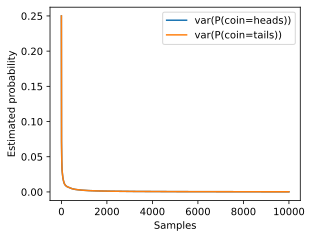

In [5]:
fair_probs = torch.tensor([0.5, 0.5])
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
variance = (estimates - 0.5) ** 2
variance = variance.cumsum(axis=0) / cum_counts.sum(dim=1, keepdims=True)
print(variance[-1,0])

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(variance[:, 0], label=("var(P(coin=heads))"))
d2l.plt.plot(variance[:, 1], label=("var(P(coin=tails))"))
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

Denote the estimated probability as X, then
$$P(X = \frac{n}{N}) = C_N^n \frac{1}{2^N}$$
Because $\sum_{m=0}^n nC_n^m = n2^{n-1}$
$$E(X)=\sum_{n=0}^N \frac{n}{N} C_N^n \frac{1}{2^N}= \frac{1}{N2^N} \sum_{n=0}^N n C_{N}^{n}=\frac{1}{N2^N} N2^{N-1}=\frac{1}{2}$$

$$Var(X)=\sum_{n=0}^N (\frac{n}{N}-\frac{1}{2})^2 C_N^n \frac{1}{2^N} = \frac{1}{2^N} \sum_{n=0}^N {(\frac{n^2}{N^2} - \frac{n}{N} + \frac{1}{4})C_N^n}$$
Because $\sum_{m=0}^n C_n^m = 2^n, \sum_{m=0}^n n^2C_n^m = n(n+1)2^{n-2}$
$$Var(X)=\frac{1}{2^N}(\frac{N(N+1)2^{N-2}}{N^2}-\frac{N2^{N-1}}{N}+\frac{2^N}{4})=\frac{1}{4N}$$
According to the `Chebyshev Inequality`:
$$P(\|X-\frac{1}{2}\|\geq \frac{k}{2\sqrt{n}} ) \leq \frac{1}{k^2}$$
where k > 1

We can say that X is the mean of $(Y_1,Y_2,...Y_n)$, $Y \sim B(1, 1/2)$. E(Y)=1/2, Var(Y)=1/4.

According to the `central limit theorem`, 
$$\lim_{n \to \infty} P((X-\frac{1}{2}) \leq \frac{z}{2\sqrt{n}})=\Phi (z)$$

<font color = red>(what about the relations?)</font>

4. **Assume that we draw $m$ samples $x_i$ from a probability distribution with zero mean and unit variance. Compute the averages $z_m \stackrel{\textrm{def}}{=} m^{-1} \sum_{i=1}^m x_i$. Can we apply Chebyshev's inequality for every $z_m$ independently? Why not?**

<font color = red>(uncertain)</font>
$$E(z_m)=0, Var(z_m)=?$$
Because we don't know if the m samples are independent to each others, so we can't get the variance of $z_m$

5. **Given two events with probability $P(\mathcal{A})$ and $P(\mathcal{B})$, compute upper and lower bounds on $P(\mathcal{A} \cup \mathcal{B})$ and $P(\mathcal{A} \cap \mathcal{B})$. Hint: graph the situation using a [Venn diagram](https://en.wikipedia.org/wiki/Venn_diagram).**

![2_6_5](material/2_6_5.png)

$$max(P(\mathcal{A}), P(\mathcal{B})) \leq P(\mathcal{A}\cup \mathcal{B}) \leq P(\mathcal{A}) + P(\mathcal{B})$$
$$0 \leq P(\mathcal{A}\cap \mathcal{B}) \leq min(P(\mathcal{A}), P(\mathcal{B}))$$

6. **Assume that we have a sequence of random variables, say $A$, $B$, and $C$, where $B$ only depends on $A$, and $C$ only depends on $B$, can you simplify the joint probability $P(A, B, C)$? Hint: this is a [Markov chain](https://en.wikipedia.org/wiki/Markov_chain).**

<font color = red>(uncertain)</font>

$$P(A, B, C) = P(C | A, B) * P(A, B) = P(C | B) * [P(B | A) * P(A)]$$

7. **In Section 2.6.5, assume that the outcomes of the two tests are not independent. In particular assume that either test on its own has a false positive rate of 10% and a false negative rate of 1%. That is, assume that $P(D =1 \mid H=0) = 0.1$ and that $P(D = 0 \mid H=1) = 0.01$. Moreover, assume that for $H = 1$ (infected) the test outcomes are conditionally independent, i.e., that $P(D_1, D_2 \mid H=1) = P(D_1 \mid H=1) P(D_2 \mid H=1)$ but that for healthy patients the outcomes are coupled via $P(D_1 = D_2 = 1 \mid H=0) = 0.02$.**
    1. Work out the joint probability table for $D_1$ and $D_2$, given $H=0$ based on the information you have so far.
    1. Derive the probability that the patient is diseased ($H=1$) after one test returns positive. You can assume the same baseline probability $P(H=1) = 0.0015$ as before.
    1. Derive the probability that the patient is diseased ($H=1$) after both tests return positive.

<font color = green>(from discussion)</font>

![2_6_7](material/2_6_7.png)

8. **Assume that you are an asset manager for an investment bank and you have a choice of stocks $s_i$ to invest in. Your portfolio needs to add up to $1$ with weights $\alpha_i$ for each stock. The stocks have an average return $\boldsymbol{\mu} = E_{\mathbf{s} \sim P}[\mathbf{s}]$ and covariance $\boldsymbol{\Sigma} = \textrm{Cov}_{\mathbf{s} \sim P}[\mathbf{s}]$.**
    1. Compute the expected return for a given portfolio $\boldsymbol{\alpha}$.
    1. If you wanted to maximize the return of the portfolio, how should you choose your investment?
    1. Compute the *variance* of the portfolio.
    1. Formulate an optimization problem of maximizing the return while keeping the variance constrained to an upper bound. This is the Nobel-Prize winning [Markovitz portfolio](https://en.wikipedia.org/wiki/Markowitz_model). To solve it you will need a quadratic programming solver, something way beyond the scope of this book.

A.

The return is:
$$r = \sum s_i a_i = \mathbf{\alpha}^T \mathbf{S}$$
$$E(r) = \mathbf{\alpha}^T E(S) = \sum a_i \mu_i = \mathbf{\alpha}^T \mathbf{\mu}$$

B.

The weight should be highest for stocks with the most highly expected return.

C.

$$Var(r)=\mathbf{\alpha}^T \mathbf{\Sigma \alpha}$$

D.
Formulate the problem:

<img src="material/2_6_8.png" width = "300" align=center />